In [8]:
from ect.optimization import ECTAntialiasOptimizer, snr, snr_sidelobe, l1dist
from ect.helpers import MultimodalGenerator, Mode
from matplotlib import pyplot as plt
from ect.helpers import Mode


2024-06-13 02:19:33.151 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=0.0
2024-06-13 02:19:33.153 | DEBUG    | ect.maps.logpolar_new:logpolar:62 - Applying bilinear pixel mapping


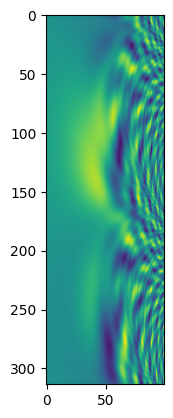

In [9]:
modes = [Mode(10, 0, .2), Mode(15, 30, .4), Mode(25, 60, .6), Mode(35, 90, .8), Mode(50, 45, 1)] 
# modes = [Mode(15, 60, .6), Mode(35, 90, .8), Mode(50, 45, 1)]
# modes = [Mode(100/x, 5, 1/x) for x in range(1, 40, 2)]
# modes = [Mode(100, 90, 1)]
gen = MultimodalGenerator(modes, offset=0, dsize=(314, 100))
# gen = RandUnimodalGenerator(offset=5, dsize=(628, 200))
opt = ECTAntialiasOptimizer(gen, snr, offset=0, ect_offset=0)

plt.imshow(gen.generate())

In [10]:
import numpy as np
snr(np.ones((100,100)), np.ones((100,100)))

-120.0000000000000001

In [11]:
r = opt.optim()

Current loss=-20.152
Current loss=-20.154
Current loss=-20.154
Current loss=-20.154
Current loss=-20.154
Current loss=-20.154
Current loss=-20.154
Current loss=-20.154


In [12]:
r

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -20.154439830280724145
        x: [ 4.937e-01  1.301e-01  2.500e-01]
      nit: 8
      jac: [-4.980e-05  3.305e-04  0.000e+00]
 hess_inv: [[ 6.315e-04  2.681e-03  0.000e+00]
            [ 2.681e-03  3.211e-02  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 232
     njev: 55

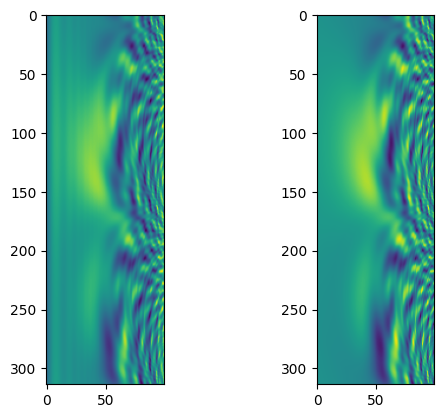

In [13]:
import cv2
inv = cv2.normalize(np.real(opt.inv), None, 1, 0, cv2.NORM_MINMAX)

plt.subplot(1,2,1)
plt.imshow(np.real(opt.inv))

plt.subplot(1,2,2)
plt.imshow(opt.image.image)

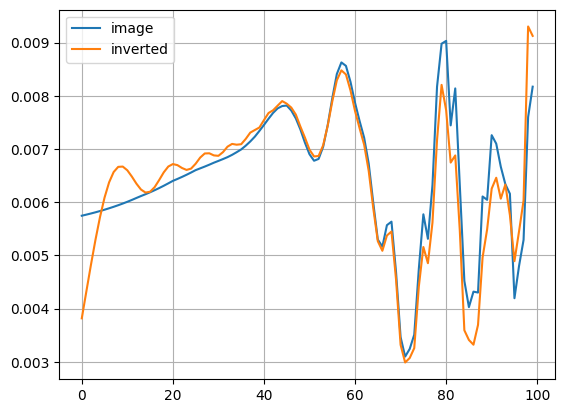

In [14]:
inorm = cv2.normalize(opt.image.generate(), None, 1, 0, cv2.NORM_L2)
invnorm = cv2.normalize(opt.inv, None, 1, 0, cv2.NORM_L2)

plt.plot(inorm[78, :])
plt.plot(invnorm[78, :])
plt.legend(["image", "inverted"])
plt.grid()

from ect.optimization import snr
from icecream import ic
# ic(snr(inorm, invnorm))